In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel(r"C:\Users\caio.santos\Downloads\Cerveja_Multicolinearidade.xlsx")

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
df.drop(['Data'], axis=1, inplace=True)
df

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,23.9,32.5,0.0,0,25461
1,27.02,24.5,33.5,0.0,0,28972
2,24.82,22.4,29.9,0.0,1,30814
3,23.98,21.5,28.6,1.2,1,29799
4,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...
360,24.00,21.1,28.2,13.6,1,32307
361,22.64,21.1,26.7,0.0,0,26095
362,21.68,20.3,24.1,10.3,0,22309
363,21.38,19.3,22.4,6.3,0,20467


In [36]:
plt.subplots(figsize=(20,20))
#df.corr()
#sns.distplot(df['Consumo de cerveja (litros)'], bins=10)
#sns.heatmap(df.corr(), annot=True)
#sns.pairplot(df)
sns.lmplot(data=df, y="Consumo de cerveja (litros)", x="Temperatura Maxima (C)", hue="Final de Semana", size(20,20))

SyntaxError: positional argument follows keyword argument (<ipython-input-36-3d321701a526>, line 6)

In [20]:
x = df.drop(['Consumo de cerveja (litros)'], axis=1)
y = df['Consumo de cerveja (litros)']

In [30]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [31]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
prediction = model.predict(x_test)

In [54]:
#result = pd.DataFrame()
#result['column'],result['coef'] = x_test.columns, model.coef_
#result.round(2)

,column,coef
0,Temperatura Media (C),231.39
1,Temperatura Minima (C),-120.65
2,Temperatura Maxima (C),547.92
3,Precipitacao (mm),-57.14
4,Final de Semana,5129.74


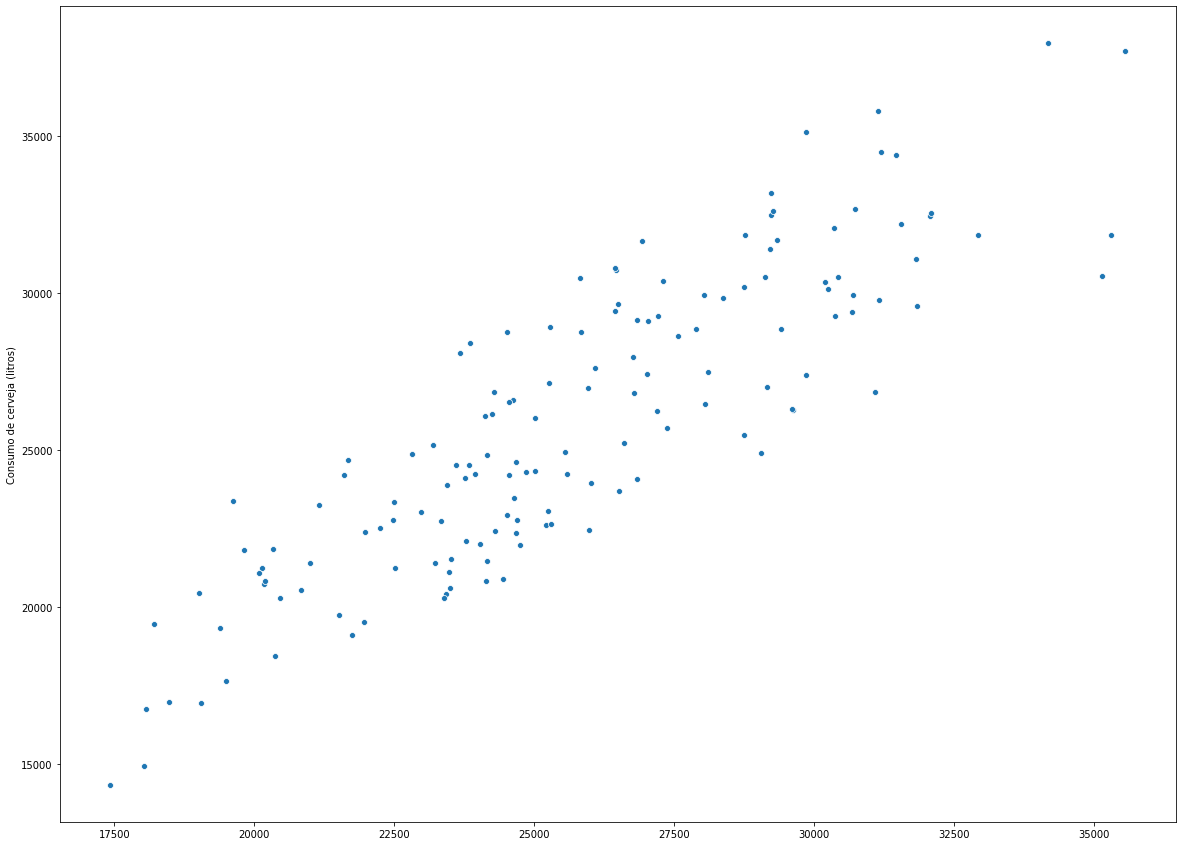

In [36]:
plt.subplots(figsize=(20,15))
sns.scatterplot(prediction, y_test)

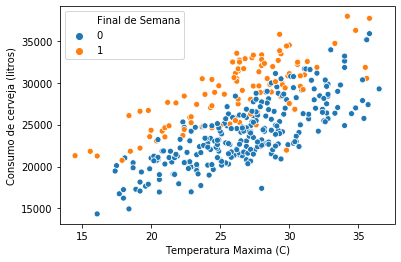

In [55]:

sns.scatterplot(df['Temperatura Maxima (C)'],df['Consumo de cerveja (litros)'],hue=df['Final de Semana'])

In [56]:
compare = pd.DataFrame()
compare['real value'] = y_test
compare['prediction'] = prediction

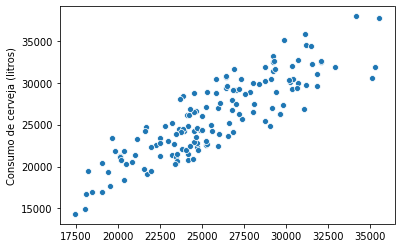

In [58]:
sns.scatterplot(prediction, y_test)

In [64]:
predictdf = model.predict(x)

In [86]:
#df.head()

In [61]:
df['Predict'] = predictdf

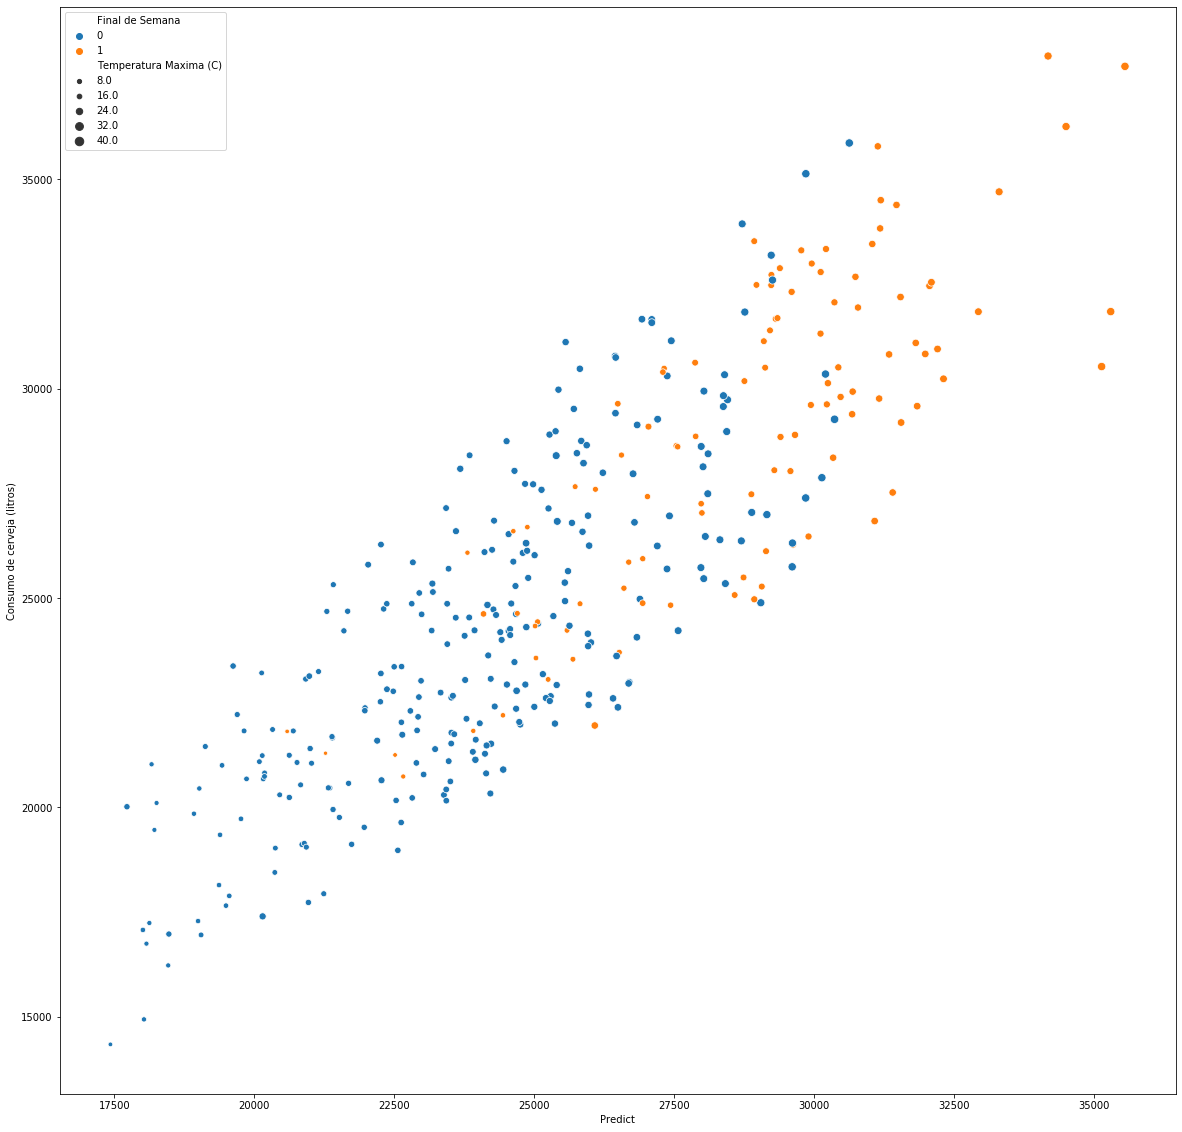

In [85]:
plt.subplots(figsize=(20,20))
cmap = sns.cubehelix_palette(rot=-.5, as_cmap=True)
sns.scatterplot(data=df, x="Predict", y="Consumo de cerveja (litros)", size="Temperatura Maxima (C)", hue="Final de Semana")